In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.BytesIO(uploaded[fn]))
  print(df.head())

Saving Dataset_1 - Sheet1.csv to Dataset_1 - Sheet1.csv
User uploaded file "Dataset_1 - Sheet1.csv" with length 289 bytes
   House ID  House Area  Number of rooms  Price
0         1        6274                8   2100
1         2        6689                5   2200
2         3        4276                8   1400
3         4        5130                9   1700
4         5        6035                6   2000


Converged after 10 iterations
Trained Weights: [1750.          460.29858174    2.14942018]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

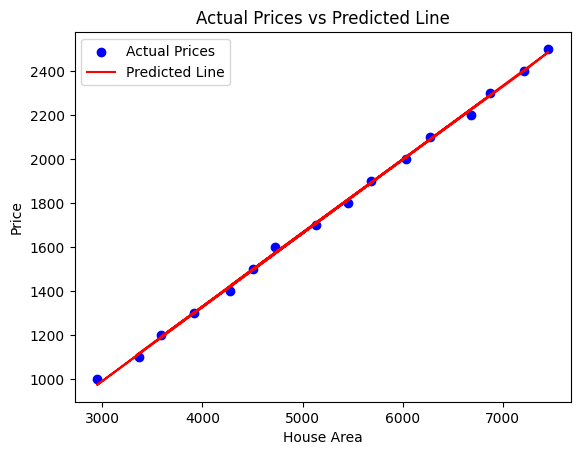

996.1008584821625
3333.9666252002103
1002.3839923938015


In [46]:
import numpy as np
import matplotlib.pyplot as plt


X = df[['House Area', 'Number of rooms']].values
y = df['Price'].values

# Normalize features to prevent overflow
# if we dont use this for weights we get [nan, nan, nan]
# also normalization ensures all features contribute equally to the model's learning process
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X.mean(axis=0)) / X.std(axis=0)


X = np.c_[np.ones(X.shape[0]), X] # Add bias
weights = np.zeros(X.shape[1])
learning_rate = 0.06


loss_threshold = 1e-6
previous_loss = 1e8 # since max of current_loss is 7 digits
for _ in range(1000):  # Maximum number of iterations
    predictions = X.dot(weights)
    current_loss = np.mean((predictions - y) ** 2)  # Mean Squared Error
    #print(current_loss)
    if np.abs(previous_loss - current_loss) < loss_threshold:
        print(f"Converged after {_} iterations")
        break

    weights -= learning_rate * X.T.dot(predictions - y)
    previous_loss = current_loss



print("Trained Weights:", weights)


final_predictions = X.dot(weights)


plt.scatter(df['House Area'], y, color='blue', label='Actual Prices')

plt.plot(df['House Area'], final_predictions, color='red', label='Predicted Line')


plt.xlabel('House Area')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Line')
plt.legend()

from google.colab import files
plt.savefig("Dataset_1.jpg")
files.download("Dataset_1.jpg")
plt.show()



ques = [(3000,5), (10000,10),(3000,12)]

for area,rooms in ques:
  normalized_area = (area - X_mean[0]) / X_std[0]
  normalized_rooms = (rooms - X_mean[1]) / X_std[1]
  t = np.array([1,normalized_area,normalized_rooms])
  print(t.dot(weights))
